In [20]:
import pandas as pd
import numpy as np

In [21]:
data=pd.read_csv("heart.csv")
df=pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221,0,1.0,164.0,1,0.0,2,0.0,2.0,1
1021,60,1,0,125.0,258,0,0.0,141.0,1,2.8,1,1.0,3.0,0
1022,47,1,0,110.0,275,0,0.0,118.0,1,1.0,1,1.0,2.0,0
1023,50,0,0,110.0,254,0,0.0,159.0,0,0.0,2,0.0,2.0,1


In [22]:
df=df.drop(columns=["age","sex"],axis=1)
df

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,125.0,212,0,NaN,168.0,0,1.0,2,2.0,3.0,0
1,0,140.0,203,1,0.0,155.0,1,3.1,0,0.0,3.0,0
2,0,145.0,174,0,1.0,125.0,1,2.6,0,0.0,3.0,0
3,0,148.0,203,0,1.0,NaN,0,0.0,2,1.0,3.0,0
4,0,138.0,294,1,1.0,106.0,0,1.9,1,3.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1,140.0,221,0,1.0,164.0,1,0.0,2,0.0,2.0,1
1021,0,125.0,258,0,0.0,141.0,1,2.8,1,1.0,3.0,0
1022,0,110.0,275,0,0.0,118.0,1,1.0,1,1.0,2.0,0
1023,0,110.0,254,0,0.0,159.0,0,0.0,2,0.0,2.0,1


In [23]:
df.dtypes

cp            int64
trestbps    float64
chol          int64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

In [24]:
df.isna().sum()

cp          0
trestbps    1
chol        0
fbs         0
restecg     1
thalach     1
exang       0
oldpeak     0
slope       0
ca          2
thal        1
target      0
dtype: int64

In [25]:
df["trestbps"]=df["trestbps"].fillna(df["trestbps"].mean())
df["restecg"]=df["restecg"].fillna(df["restecg"].mean())
df["thalach"]=df["thalach"].fillna(df["thalach"].mean())
df["ca"]=df["ca"].fillna(df["ca"].mean())
df["thal"]=df["thal"].fillna(df["thal"].mean())
df.isna().sum()

cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

model=knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)

Y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [30]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_pred,Y_test))

0.827922077922078


In [31]:
from matplotlib import pyplot 

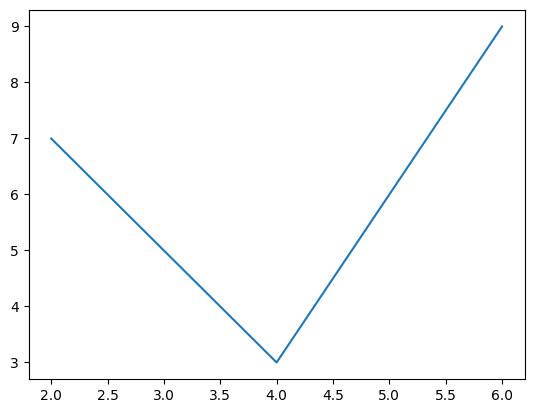

In [32]:
x=[2,3,4,5,6]
y=[7,5,3,6,9]

pyplot.plot(x,y)
pyplot.show()